# Mean Squared Error, Empirical Risk Minimization

## DSC 40A, Fall 2022

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [2]:
survey = pd.read_csv('data_scientist_salaries.csv')
survey

Respondent Hobby OpenSource        Country         Student  \
0             91   Yes        Yes  United States              No   
1            129   Yes        Yes  United States  Yes, full-time   
2            214   Yes         No  United States              No   
3            446   Yes        Yes  United States              No   
4            452   Yes        Yes  United States              No   
...          ...   ...        ...            ...             ...   
1116       75174   Yes        Yes  United States              No   
1117       78442   Yes         No  United States              No   
1118       79399   Yes        Yes  United States  Yes, full-time   
1119       86221   Yes        Yes  United States  Yes, part-time   
1120       97333   Yes         No  United States              No   

                                  Employment  \
0                         Employed full-time   
1                         Employed full-time   
2                         Employed full-time   
3                         Employed full-time   
4                         Employed full-time   
...                                      ...   
1116      Not employed, but looking for work   
1117  Not employed, and not looking for work   
1118      Not employed, but looking for work   
1119      Not employed, but looking for work   
1120      Not employed, but looking for work   

                                        FormalEducation  \
0           Master’s degree (MA, MS, M.Eng., MBA, etc.)   
1     Some college/university study without earning ...   
2              Bachelor’s degree (BA, BS, B.Eng., etc.)   
3              Bachelor’s degree (BA, BS, B.Eng., etc.)   
4           Master’s degree (MA, MS, M.Eng., MBA, etc.)   
...                                                 ...   
1116                                   Associate degree   
1117        Master’s degree (MA, MS, M.Eng., MBA, etc.)   
1118          Other doctoral degree (Ph.D, Ed.D., etc.)   
1119        Master’s degree (MA, MS, M.Eng., MBA, etc.)   
1120                 Professional degree (JD, MD, etc.)   

                                         UndergradMajor  \
0     Computer science, computer engineering, or sof...   
1     Computer science, computer engineering, or sof...   
2     A social science (ex. anthropology, psychology...   
3     Information systems, information technology, o...   
4     A social science (ex. anthropology, psychology...   
...                                                 ...   
1116  A business discipline (ex. accounting, finance...   
1117  Computer science, computer engineering, or sof...   
1118  Computer science, computer engineering, or sof...   
1119  Computer science, computer engineering, or sof...   
1120  A health science (ex. nursing, pharmacy, radio...   

                   CompanySize  \
0     10,000 or more employees   
1           20 to 99 employees   
2     1,000 to 4,999 employees   
3         100 to 499 employees   
4           20 to 99 employees   
...                        ...   
1116                       NaN   
1117                       NaN   
1118                       NaN   
1119                       NaN   
1120                       NaN   

                                                DevType  ...  \
0     Back-end developer;Data scientist or machine l...  ...   
1     Back-end developer;Data scientist or machine l...  ...   
2     Data scientist or machine learning specialist;...  ...   
3     Back-end developer;Data scientist or machine l...  ...   
4     Back-end developer;Data scientist or machine l...  ...   
...                                                 ...  ...   
1116  Back-end developer;C-suite executive (CEO, CTO...  ...   
1117  Back-end developer;Data or business analyst;Da...  ...   
1118  C-suite executive (CEO, CTO, etc.);Data scient...  ...   
1119  Data or business analyst;Data scientist or mac...  ...   
1120  Data scientist or machine learning specialist;...  ...   

                

In [3]:
survey.get('Salary')

0       120000.0
1       120000.0
2        70000.0
3       185000.0
4       125000.0
          ...   
1116    120000.0
1117     40000.0
1118    149000.0
1119     57000.0
1120     50000.0
Name: Salary, Length: 1121, dtype: float64

In [4]:
# Makes sure only real salaries are considered
survey = survey[survey.get('Salary') > 1]

### Descriptive statistics

In [5]:
survey.get('Salary').min()

6.31

In [6]:
survey.get('Salary').median()

100000.0

In [7]:
survey.get('Salary').mean()

110933.34956171736

In [8]:
survey.get('Salary').max()

2000000.0

In [9]:
np.percentile(survey.get('Salary'), 95)

200000.0

### Distribution of all salaries

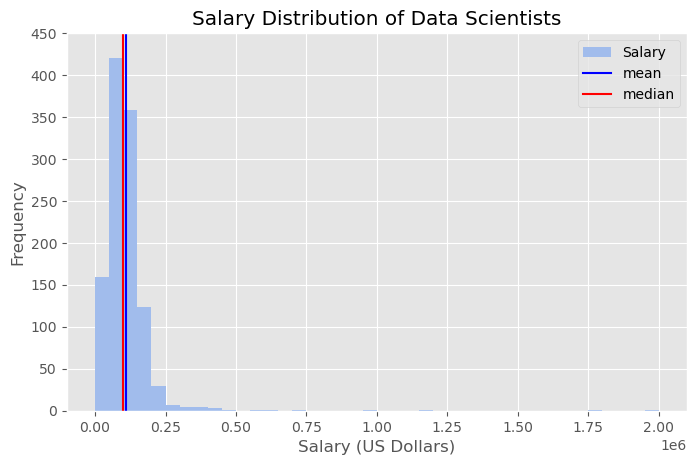

In [10]:
plt.figure(figsize=(8,5), dpi=100)
mean, med = survey.get('Salary').mean(), survey.get('Salary').median()
survey.get('Salary').plot(kind='hist', bins=40, color='#A1BCEC')
plt.plot([mean, mean], [0, 500], label='mean', color='blue')
plt.plot([med, med], [0, 500], label='median', color='red')
plt.title('Salary Distribution of Data Scientists')
plt.xlabel('Salary (US Dollars)')
plt.ylim(0, 450)
plt.legend();
# plt.savefig('salary_distribution.pdf', bbox_inches='tight')

### Distribution of the 99th percentile of salaries

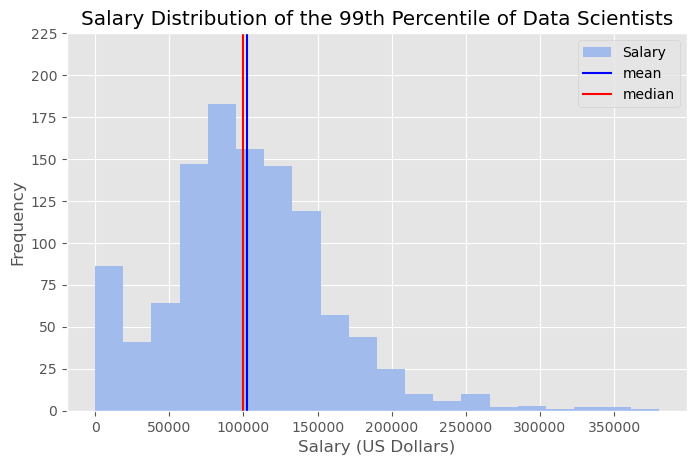

In [11]:
plt.figure(figsize=(8,5), dpi=100)
survey_99 = survey[survey.get('Salary') < np.percentile(survey.get('Salary'), 99)]
mean, med = survey_99.get('Salary').mean(), survey_99.get('Salary').median()
survey_99.get('Salary').plot(kind='hist', bins=20, color='#A1BCEC')
plt.plot([mean, mean], [0, 500], label='mean', color='blue')
plt.plot([med, med], [0, 500], label='median', color='red')
plt.xlabel('Salary (US Dollars)')
plt.title('Salary Distribution of the 99th Percentile of Data Scientists');
plt.ylim(0, 225)
plt.legend();
# plt.savefig('salary_distribution_trimmed.pdf', bbox_inches='tight')